In [2]:
from qiskit import transpile, QuantumCircuit
import qiskit.quantum_info as qi

from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, amplitude_damping_error

from qiskit.visualization import plot_histogram

In [3]:
# CNOT matrix operator with qubit-0 as control and qubit-1 as target
g_op = qi.Operator([[-1/2, 1/2, -1/2, 1/2],
                     [1/2, -1/2, -1/2, 1/2],
                     [1/2,1/2,1/2, 1/2],
                     [1/2, 1/2, -1/2, -1/2]])

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import QFT
import numpy as np

pi = np.pi

# IBMQ.enable_account('ENTER API KEY HERE')
provider = IBMQ.get_provider(hub='ibm-q')

backend = provider.get_backend('ibmq_qasm_simulator')

q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')

circuit = QuantumCircuit(q, c)

circuit.h(q[2])
circuit.h(q[1])
circuit.h(q[0])

qft_gate = QFT(num_qubits=3, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers=False, name='qft')
circuit.append(qft_gate, q)
circuit.measure(q, c)
circuit.draw(output='mpl', filename='qft1.png')
print(circuit)

job = execute(circuit, backend, shots=1000)

job_monitor(job)

counts = job.result().get_counts()

print("\n QFT Output")
print("-------------")
print(counts)

          ┌───┐┌────────────┐┌───────┐┌─┐         
 upper_0: ┤ H ├┤0           ├┤0      ├┤M├─────────
          ├───┤│            ││       │└╥┘┌─┐      
 upper_1: ┤ H ├┤            ├┤1      ├─╫─┤M├──────
          ├───┤│            ││  IQFT │ ║ └╥┘┌─┐   
 upper_2: ┤ H ├┤            ├┤2      ├─╫──╫─┤M├───
          ├───┤│            ││       │ ║  ║ └╥┘┌─┐
 upper_3: ┤ H ├┤            ├┤3      ├─╫──╫──╫─┤M├
          └───┘│            │└───────┘ ║  ║  ║ └╥┘
bottom_0: ─────┤  grover_op ├──────────╫──╫──╫──╫─
               │            │          ║  ║  ║  ║ 
bottom_1: ─────┤            ├──────────╫──╫──╫──╫─
               │            │          ║  ║  ║  ║ 
bottom_2: ─────┤            ├──────────╫──╫──╫──╫─
               │            │          ║  ║  ║  ║ 
bottom_3: ─────┤            ├──────────╫──╫──╫──╫─
               │            │          ║  ║  ║  ║ 
 ancilla: ─────┤1           ├──────────╫──╫──╫──╫─
               └────────────┘          ║  ║  ║  ║ 
  creg: 4/═════════════════════

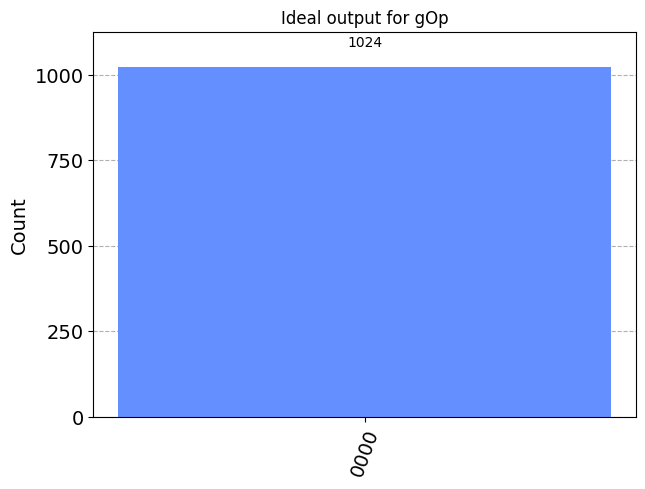

In [15]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from math import pi
from qiskit.circuit.library import QFT

# Example usage
N = 15
t=4 # log_2(N) upper limit
n=t
# Create quantum registers
upper_register = QuantumRegister(n, 'upper')
bottom_register = QuantumRegister(t, 'bottom')
ancilla = QuantumRegister(1, 'ancilla')
classical_reg = ClassicalRegister(n, 'creg')

# Construct quantum circuit
qc = QuantumCircuit(upper_register, bottom_register, ancilla, classical_reg)

# Apply Hadamard gates on upper register
qc.h(upper_register)

qc.unitary(g_op, [0, 8], label='grover_op')

# Apply Inverse Quantum Fourier Transform (IQFT)
qc.append(QFT(n, inverse=True), upper_register)

# Measure upper register
qc.measure(upper_register, classical_reg)

print(qc)

sim_ideal = AerSimulator()
tbell_circ = transpile(qc, sim_ideal)

ideal_result = sim_ideal.run(tbell_circ).result()
ideal_counts = ideal_result.get_counts(0)
plot_histogram(ideal_counts,
               title='Ideal output for gOp')

